In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy.linalg as la
import scipy.optimize as sopt
import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

def f(x):
    return np.exp(x[0] + 3 * x[1] - 0.1) +np.exp(x[0] - 3 * x[1] - 0.1) + np.exp(- x[0] - 0.1)

def df(x):
    dfx1 = np.exp(x[0] + 3 * x[1] - 0.1) +np.exp(x[0] - 3 * x[1] - 0.1) - np.exp(- x[0] - 0.1)
    dfx2 = 3 * np.exp(x[0] + 3 * x[1] - 0.1) - 3 * np.exp(x[0] - 3 * x[1] -0.1)
    return  np.array([dfx1, dfx2]) 

def ddf(x):
    dfx11 = np.exp(x[0] + 3 * x[1] - 0.1) +np.exp(x[0] - 3 * x[1] - 0.1) - np.exp(- x[0] - 0.1)
    dfx12 = 3 * np.exp(x[0] + 3 * x[1] - 0.1) - 3 * np.exp(x[0] - 3 * x[1] -0.1)
    dfx21 = 3 * np.exp(x[0] + 3 * x[1] - 0.1) - 3 * np.exp(x[0] - 3 * x[1] -0.1)
    dfx22 = 9 * np.exp(x[0] + 3 * x[1] - 0.1) - 9 * np.exp(x[0] - 3 * x[1] -0.1)
    return np.array([[dfx11, dfx12], [dfx21, dfx22]])

In [21]:
t = 1
count = 1
x0 = np.array([-1.3,1.3])
dx0 = np.array([.1, 0.05])  #arbitrary descent direction 
a = 0.1
b = 0.7


def backtrack(x0, df, t, a, b, count):
    
    while (np.any(f(x0 + t * dx0) > f(x0) + a*t*df(x0)*dx0.T)):
        t *= b
        
        count += 1
    return t

t = backtrack(x0, df, t, a, b,count)

print("\nfinal step size :",  t)


final step size : 1.9244817692775262e-15


In [44]:
def NGS(f,df,theta,H=None,mode=0,eps=1e-12,max_iter=1e2):
     
        x_pre=x_cur=theta=x0
        g=df(x_cur)
        
        H = ddf(x0)
        k=0
        while k<max_iter and np.sum(np.abs(g))>eps:
            d=-g*H
            step = backtrack(x0, df, t, a, b,count)
            x_cur = x_pre - np.linalg.inv(ddf(x0)) @ g
            s=step*d
            y=df(x_cur)-df(x_pre)
            ys=np.sum(y*s.T)
            print(g, s, ys, y, d)
            if abs(ys)<eps:
                break
            
            k+=1
            print(k)
        return x_cur
H = ddf(x0)
x_cur = NGS(f, df, H, mode = 0, eps = 1e-12, max_iter= 1e2)
print(x_cur)

[ 8.86736863 36.5325071 ] [[-1.51322437e-13 -2.56845970e-12]
 [-6.23430495e-13 -7.70537910e-12]] 2.2880594276545232e-10 [-13.40885676 -23.0929488 ] [[  -78.63022645 -1334.62407504]
 [ -323.94720751 -4003.87222512]]
1
[ 8.86736863 36.5325071 ] [[-1.51322437e-13 -2.56845970e-12]
 [-6.23430495e-13 -7.70537910e-12]] 2.2880594276545232e-10 [-13.40885676 -23.0929488 ] [[  -78.63022645 -1334.62407504]
 [ -323.94720751 -4003.87222512]]
2
[ 8.86736863 36.5325071 ] [[-1.51322437e-13 -2.56845970e-12]
 [-6.23430495e-13 -7.70537910e-12]] 2.2880594276545232e-10 [-13.40885676 -23.0929488 ] [[  -78.63022645 -1334.62407504]
 [ -323.94720751 -4003.87222512]]
3
[ 8.86736863 36.5325071 ] [[-1.51322437e-13 -2.56845970e-12]
 [-6.23430495e-13 -7.70537910e-12]] 2.2880594276545232e-10 [-13.40885676 -23.0929488 ] [[  -78.63022645 -1334.62407504]
 [ -323.94720751 -4003.87222512]]
4
[ 8.86736863 36.5325071 ] [[-1.51322437e-13 -2.56845970e-12]
 [-6.23430495e-13 -7.70537910e-12]] 2.2880594276545232e-10 [-13.4088567

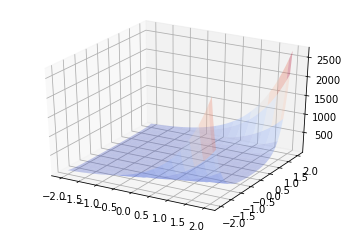

In [45]:
fig = pt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh,
                alpha=0.3, cmap=pt.cm.coolwarm, rstride=3, cstride=3)

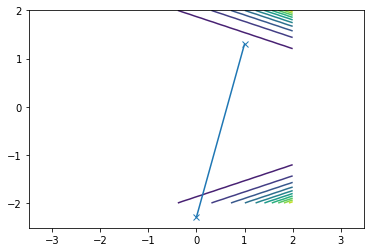

In [41]:
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, 10)

plt.plot(x_cur, "x-")

Comments:

The Newton Raphson method converges extremely rapidly to the global solution.

Newton's Method takes a long time per iteration and is memory-intensive. Newton's Method requires computing the second derivative, H, which is O(N2), where N is the number of features.